In [1]:
import numpy as np

#생성된 플롯을 그리기 위해 필요함
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#KNN 알고리즘으로 기계학습을 시키기 위해 분류기 임포트
from sklearn.neighbors import KNeighborsClassifier


In [2]:


iris_dataset=load_iris()
#데이터셋 자료형의 key
print("dataset의 키",iris_dataset.keys())

#iris 데이터셋의 description
print(iris_dataset['DESCR'])

#iris 데이터셋의 타입 : <class 'sklearn.utils.Bunch'>
print(type(iris_dataset))

#iris 데이터셋의 data 타입 : <class 'numpy.ndarray'>
print(type(iris_dataset.data))

#iris 데이터셋의 형식
print(iris_dataset.data.shape)

#타겟의 이름
print(iris_dataset['target_names'])

#특징의 이름
print(iris_dataset['feature_names'])

#데이터셋의 식별 데이터
print(iris_dataset['target'])

#데이터셋의 특징 데이터
print(iris_dataset['data'][:5])


dataset의 키 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal wi

x_tarin의 크기 (100, 4)
y_tarin의 크기 (100,)
x_test의 크기 (50, 4)
y_test의 크기 (50,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.7               2.9                4.2               1.3
1                7.6               3.0                6.6               2.1
2                5.6               3.0                4.5               1.5
3                5.1               3.5                1.4               0.2
4                7.7               2.8                6.7               2.0


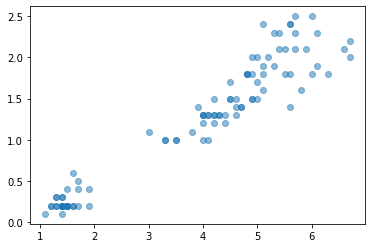

In [3]:

#데이터셋 분할(훈련,테스트)
# x_train,x_test,y_train,y_test=train_test_split(iris_dataset.data,iris_dataset.target,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(iris_dataset.data,iris_dataset.target,test_size=0.33,random_state=42)


print('x_tarin의 크기',x_train.shape)
print('y_tarin의 크기',y_train.shape)

print('x_test의 크기',x_test.shape)
print('y_test의 크기',y_test.shape)



#iris데이터프레임(x_train을 이용한) 만들기
iris_df=pd.DataFrame(x_train,columns=iris_dataset.feature_names)
print (iris_df.head())
#넘파이로 데이터의 산전도행렬 표현
# pd.plotting.scatter_matrix(iris_df,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=0.8,cmap=mglearn.cm3)
plt.plot('petal length (cm)','petal width (cm)',data=iris_df,linestyle='none',marker='o',alpha=0.5)
plt.show()


In [4]:

#가장 가까운 1개의 이웃의 영향을 받아 분류하도록 함
knn=KNeighborsClassifier(n_neighbors=1)

#x데이터와 y라벨로 fit 시켜준다=학습
knn.fit(x_train,y_train)

#새로운 데이터를 예측하기
unknown_data=[[5,2.9,1,0.2]]
guesses=knn.predict(unknown_data)
print('predict:',guesses)
print('predict name:',iris_dataset['target_names'][guesses])
# print(type(iris_dataset['target_names']),iris_dataset['target_names'].shape )

#테스트 데이터의 정확도 평가하기
print('test_x accuracy :',knn.score(x_test,y_test))


predict: [0]
predict name: ['setosa']
test_x accuracy : 0.98


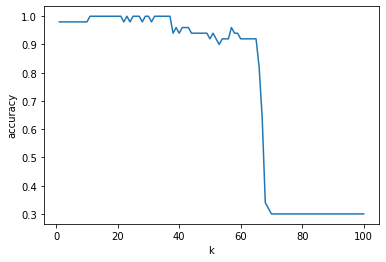

In [5]:

#k값의 변동에 따른 모델의 정확도 시각화
k_range=range(1,101)
accuracy=list()

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    accuracy.append(knn.score(x_test,y_test))

plt.plot(k_range,accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()